## load data glaucoma

### load train data

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os 
IMG_SIZE=224
DATADIR="/content/drive/My Drive/HIGHMIDCHANCEGLAUMYOPIAmaculopathyRP/TRAIN"
CATEGORIES=["healthy","maculopathy"]

training_data=[]
def create_training_data():
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 
      new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array,class_num])
create_training_data()

In [ ]:
print(len(training_data))

84


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample[1])

0
1
1
1
1
1
1
1
1
1


In [ ]:
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X=x/255.0
Y=np.array(y)
print(Y)

[0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 0]


### load data test

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os 
IMG_SIZE=224
DATATestDIR="/content/drive/My Drive/HIGHMIDCHANCEGLAUMYOPIAmaculopathyRP/TEST"
CATEGORIES=["healthy","maculopathy"]

testing_data=[]
def create_testing_data():
  for category in CATEGORIES:
    path=os.path.join(DATATestDIR,category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 
      new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      testing_data.append([new_array,class_num])
create_testing_data()
print(len(testing_data))

20


In [ ]:
random.shuffle(testing_data)
for sample in training_data[:10]:
  print(sample[1])

0
1
1
1
1
1
1
1
1
1


In [ ]:
xtest=[]
ytest=[]
for features, label in testing_data:
  xtest.append(features)
  ytest.append(label)
xtest=np.array(xtest).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Xtest=xtest/255.0
Ytest=np.array(ytest)
print(Ytest)

[0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1]


## model

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [ ]:
image_batch=X[:2]

image_batch.shape

(2, 224, 224, 3)

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(2, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(2, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)

prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(2, 1)


In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer,
])

In [ ]:
base_learning_rate = 0.1

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(X,Y,batch_size=4,steps = validation_steps)

20/20 [==============================] - 0s 10ms/step - loss: 0.6714 - accuracy: 0.4375


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.67
initial accuracy: 0.44


In [ ]:
history = model.fit(X,Y,batch_size=4,epochs=initial_epochs)

Epoch 1/10
21/21 [==============================] - 0s 9ms/step - loss: 7.6005 - accuracy: 0.7143
Epoch 2/10
21/21 [==============================] - 0s 8ms/step - loss: 0.4147 - accuracy: 0.9762
Epoch 3/10
21/21 [==============================] - 0s 7ms/step - loss: 2.5020 - accuracy: 0.9286
Epoch 4/10
21/21 [==============================] - 0s 7ms/step - loss: 3.4833 - accuracy: 0.8571
Epoch 5/10
21/21 [==============================] - 0s 7ms/step - loss: 0.0836 - accuracy: 0.9881
Epoch 6/10
21/21 [==============================] - 0s 7ms/step - loss: 5.7282e-05 - accuracy: 1.0000
Epoch 7/10
21/21 [==============================] - 0s 7ms/step - loss: 2.9801e-05 - accuracy: 1.0000
Epoch 8/10
21/21 [==============================] - 0s 7ms/step - loss: 9.6296e-06 - accuracy: 1.0000
Epoch 9/10
21/21 [==============================] - 0s 7ms/step - loss: 3.3270e-06 - accuracy: 1.0000
Epoch 10/10
21/21 [==============================] - 0s 7ms/step - loss: 7.8947e-07 - accuracy: 1.0000

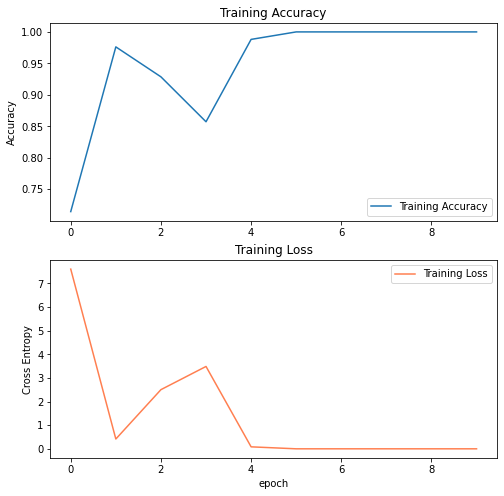

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss',color='coral')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

## testing

In [ ]:
'''
from sklearn.metrics import confusion_matrix
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(Xtest)
print(predictions)
print(Ytest.shape)
tn, fp, fn, tp= confusion_matrix(Ytest, prediction)
'''

'\nfrom sklearn.metrics import confusion_matrix\nprobability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])\npredictions = probability_model.predict(Xtest)\nprint(predictions)\nprint(Ytest.shape)\ntn, fp, fn, tp= confusion_matrix(Ytest, prediction)\n'

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = tf.keras.activations.sigmoid(model.predict(Xtest)).numpy()
print(predictions)
FINNAL_CLASIFICATION=[]
for r in predictions:
 if(r>0.5):
   r=1
 elif(r<=0.5):
   r=0
 FINNAL_CLASIFICATION.append(r)
FINNAL_CLASIFICATION=np.array(FINNAL_CLASIFICATION)
print(FINNAL_CLASIFICATION)
print(Ytest)
tn, fp, fn, tp = confusion_matrix(Ytest, FINNAL_CLASIFICATION).ravel()

acc=(tn+tp)/(tn+ fp+ fn+tp)
sen= tp / (tp+fn)
spec = tn / (tn+fp)


print(acc)
print(sen)
print(spec)

[[5.0476592e-06]
 [1.0000000e+00]
 [9.5903891e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [5.2098051e-24]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4711582e-10]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.0922223e-07]
 [1.0000000e+00]
 [1.4910991e-06]
 [1.0000000e+00]]
[0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1]
[0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1]
0.95
1.0
0.8333333333333334
